<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/39_Pro_%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8%2C_%D0%B3%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BD%D0%B0_%D0%B1%D0%B0%D0%B7%D0%B5_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_(%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Pro

Макс 10 баллов

Сделайте генерацию аудио с помощью VAE.

Возьмите базу жанров музыки.

Обучите вариационный автокодировщик на всей базе на основе спектрограмм (mfcc).
Сделайте генерацию спектрограмм с помощью VAE.

Сделайте обратное превращение из спектра в аудио с помощью librosa.feature.inverse.mfcc_to_audio.

Подробнее https://librosa.org/doc/latest/generated/librosa.feature.inverse.mfcc_to_audio.html?highlight=mfcc_to_audio#librosa.feature.inverse.mfcc_to_audio

# Классификация музыкальных жанров



# Загрузка библиотек

In [ ]:
!pip install keras==2.0 -q # загружаем эту версию кераса для корректной работы скрипта
!pip install tensorflow==1.13.2 -q  # загружаем эту версию тензорфлоу  для корректной работы скрипта

     |████████████████████████████████| 191 kB 7.5 MB/s 
     |████████████████████████████████| 497.5 MB 23 kB/s 
     |████████████████████████████████| 15.7 MB 65.7 MB/s 
     |████████████████████████████████| 495.0 MB 28 kB/s 
     |████████████████████████████████| 463.8 MB 33 kB/s 
     |████████████████████████████████| 5.6 MB 56.9 MB/s 
     |████████████████████████████████| 132 kB 94.8 MB/s 
     |████████████████████████████████| 462 kB 93.4 MB/s 
     |████████████████████████████████| 458.3 MB 11 kB/s 
     |████████████████████████████████| 458.3 MB 11 kB/s 
     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 460.3 MB 8.9 kB/s 
     |████████████████████████████████| 462 kB 76.2 MB/s 
     |████████████████████████████████| 4.0 MB 84.4 MB/s 
     |████████████████████████████████| 1.2 MB 72.0 MB/s 
     |████████████████████████████████| 92.7 MB 129.4 MB/s 
     |████████████████████████████████| 367 kB 84.1 MB/s 
     |█████

In [ ]:
#Подключаем библиотеки
from google.colab import files #Загрузка файлов
from tensorflow.keras import utils #Для to_categorical
import os #Работа с папками и файлами
import librosa #Параметризация аудио
import numpy as np #Numpy массивы
import matplotlib.pyplot as plt #Отображение графиков
#Отрисовка графиков в ячейках collab
%matplotlib inline 
import librosa.display
import IPython.display
import os
from IPython.display import clear_output
from tensorflow.keras.backend import sigmoid

from tensorflow.keras.optimizers import Adam, RMSprop #Оптимизатор для задания шага обучения
from tensorflow.keras.models import Sequential, Model #Два формата модели keras
from tensorflow.keras.layers import concatenate, MaxPooling2D, Activation, Input, Dense, Dropout, BatchNormalization, MaxPooling1D, GlobalAveragePooling1D, Flatten, Conv1D, Conv2D, AveragePooling2D, LSTM #Базовые слови
from sklearn.model_selection import train_test_split #Разбиение на обучающую и проверочную выборку
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image #Для отрисовки изображений

from tensorflow.keras.layers import Lambda, Reshape
from tensorflow.keras import backend as K # устанавливаем переменную для окружения кераса
from keras.objectives import binary_crossentropy
import IPython.display as ipd
 


In [ ]:
from google.colab import drive #подключаем библиотеку для работы с google диском
drive.mount('/content/drive') #монтируем google диск
#Базу для ноутбука можно скачать по ссылке
#http://marsyas.info/downloads/datasets.html

Mounted at /content/drive


# Загрузка данных

In [ ]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/Базы/genres.zip' #распаковываем архив на google диске на локальный диск google colaboratory 

genres = os.listdir('genres') # получаем список папок в распакованной папке

#Проверяем выгруженные папки
!ls genres 
#И одну из папок
!ls genres/blues

blues  classical  country  disco  hiphop  jazz	metal  pop  reggae  rock
blues.00000.au	blues.00020.au	blues.00040.au	blues.00060.au	blues.00080.au
blues.00001.au	blues.00021.au	blues.00041.au	blues.00061.au	blues.00081.au
blues.00002.au	blues.00022.au	blues.00042.au	blues.00062.au	blues.00082.au
blues.00003.au	blues.00023.au	blues.00043.au	blues.00063.au	blues.00083.au
blues.00004.au	blues.00024.au	blues.00044.au	blues.00064.au	blues.00084.au
blues.00005.au	blues.00025.au	blues.00045.au	blues.00065.au	blues.00085.au
blues.00006.au	blues.00026.au	blues.00046.au	blues.00066.au	blues.00086.au
blues.00007.au	blues.00027.au	blues.00047.au	blues.00067.au	blues.00087.au
blues.00008.au	blues.00028.au	blues.00048.au	blues.00068.au	blues.00088.au
blues.00009.au	blues.00029.au	blues.00049.au	blues.00069.au	blues.00089.au
blues.00010.au	blues.00030.au	blues.00050.au	blues.00070.au	blues.00090.au
blues.00011.au	blues.00031.au	blues.00051.au	blues.00071.au	blues.00091.au
blues.00012.au	blues.00032.a

In [ ]:
# Создаем x_train
x_train = [] # Создаем пустой список , в котором будут храниться mfcc каждого файла
for i in range(len(genres)):
  g = genres[i]
  for filename in os.listdir(f'./genres/{g}'):
    songname = f'./genres/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30) #читаем очередной файл
    mfcc = librosa.feature.mfcc(y=y, sr=sr) # создаем mfcc файла
    x_train.append(mfcc[:,:1290]) # добавляем mfcc в x_train (1290 - минимальная длина mfcc из всез файлов , для корректного создания np array )
  print('Жанр', g, 'готов')
x_train = np.array(x_train) # переводим данные в numpy array

Жанр classical готов
Жанр jazz готов
Жанр hiphop готов
Жанр pop готов
Жанр rock готов
Жанр disco готов
Жанр blues готов
Жанр metal готов
Жанр country готов
Жанр reggae готов


In [ ]:
print(x_train.shape)
print(x_train[0][0])

(1000, 20, 1290)
[-246.96524 -261.05185 -286.74063 ... -337.4762  -337.22693 -334.19272]


In [ ]:
batch_size = 20 # Размер батча
latent_dim = 10 # Размерность скрытого пространства
dropout_rate = 0.1 # Dropout parametr 
start_lr = 0.01 # Параметр оптимайзера
mfcc_len = 20 # Количество уровней mfcc (стандартно 20)
mfcc_count = 400 # Длинна mfcc (устанавливает длинну звукового участка)

In [ ]:
# Получаем короткие отрезки mfcc, динной mfcc_count
curr = x_train[:,:,:mfcc_count]
X_train, X_test = train_test_split(curr, shuffle = True, test_size=0.1)
#X_train = curr[:-100,:,:]
#X_test = curr[-100:,:,:]
print (X_train.shape)
print (X_test.shape)

(900, 20, 400)
(100, 20, 400)


#VAE

In [ ]:
def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
def create_vae():
    models = {} # Массив элементов автокодировщика (энкодер, декодер, VAE, ...)

    # Добавим Dropout и BatchNormalization
    def apply_bn_and_dropout(x):
        return Dropout(dropout_rate)(BatchNormalization()(x))

    # Энкодер
    input_img = Input(batch_shape=(batch_size, mfcc_len, mfcc_count))

    x = Flatten()(input_img)      
    x = Dense(64, activation='relu')(x)
    x = apply_bn_and_dropout(x)    
    x = Dense(32, activation='relu')(x)
    x = apply_bn_and_dropout(x)

    # Предсказываем параметры распределений
    # Вместо того, чтобы предсказывать стандартное отклонение, предсказываем логарифм вариации    
    
    # Мю-слой
    z_mean = Dense(latent_dim)(x) 

    # Сигма-слой
    z_log_var = Dense(latent_dim)(x)

    # Сэмплирование из Q с трюком репараметризации (Переводим вектор нормального распределения в распределение "мю-сигма")
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)        
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # Добавляем свой собственный слой Lambda  
    l = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    
    # # Записываем элементы в список models
    # models["encoder"]  = Model(input_img, l, 'Encoder')     
    # models["z_meaner"] = Model(input_img, z_mean, 'Enc_z_mean')    
    # models["z_lvarer"] = Model(input_img, z_log_var, 'Enc_z_log_var')

    # Записываем элементы в список models
    models["encoder"]  = Model(input_img, l)     
    models["z_meaner"] = Model(input_img, z_mean)    
    models["z_lvarer"] = Model(input_img, z_log_var)

    # Декодер
    z = Input(shape=(latent_dim, ))
    x = Dense(32, activation='relu')(z) 
    x = apply_bn_and_dropout(x)
    x = Dense(64, activation='relu')(x)   
    x = apply_bn_and_dropout(x)  
    x = Dense(mfcc_len*mfcc_count, activation='sigmoid')(x)
    decoded = Reshape((mfcc_len, mfcc_count))(x)
    
    models["decoder"] = Model(z, decoded, name='Decoder')    
    models["vae"] = Model(input_img, models["decoder"](models["encoder"](input_img)), name='VAE')

    # Создаем функцию ошибки
    def vae_loss(x, decoded):
      # Решейпим оригинальный пример (x) и генерированный (decoded))
        x = K.reshape(x, shape=(batch_size, mfcc_len*mfcc_count))
        decoded = K.reshape(decoded, shape=(batch_size, mfcc_len*mfcc_count))
        # Вычисляем стандартную ошибку с помощью binary_crossentropy
        xent_loss = mfcc_len*mfcc_count*binary_crossentropy(x, decoded) 
        # Вычисляем расстояние кульбака-лейблера
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        # Возвращаем окончательную ошибку
        return abs((xent_loss + kl_loss)/2/mfcc_len/mfcc_count)

    # Возвращаем список модели и функцию ошибки
    return models, vae_loss

models, vae_loss = create_vae()
vae = models["vae"]

In [ ]:
# Преобразуем данные в диапазон 0..1
minn = np.min(X_train)
xx_train = X_train - minn
xx_test = X_test - minn
maxx = np.max(xx_train)
xx_train = xx_train / maxx 
xx_test = xx_test / maxx 

In [ ]:
# Комплируем сеть
vae.compile(optimizer=Adam(start_lr), loss=vae_loss)

In [ ]:
# Запуск обучения 
vae.fit(xx_train, xx_train, shuffle=True, epochs=50,
        batch_size=batch_size,
        validation_data = [xx_test, xx_test],
        verbose=1)

Train on 900 samples, validate on 100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
900/900 [==============================] - 4s 4ms/sample - loss: 0.3088 - val_loss: 13812537325643681637848842240.0000
Epoch 2/50
900/900 [==============================] - 2s 3ms/sample - loss: 0.2892 - val_loss: 1563575.5375
Epoch 3/50
900/900 [==============================] - 2s 2ms/sample - loss: 0.2882 - val_loss: 0.3661
Epoch 4/50
900/900 [==============================] - 1s 2ms/sample - loss: 0.2880 - val_loss: 0.2892
Epoch 5/50
900/900 [==============================] - 1s 1ms/sample - loss: 0.2878 - val_loss: 0.2878
Epoch 6/50
900/900 [==============================] - 1s 2ms/sample - loss: 0.2877 - val_loss: 0.2876
Epoch 7/50
900/900 [==============================] - 1s 2ms/sample - loss: 0.2876 - val_loss: 0.2876
Epoch 8/50
900/900 [==============================] - 1s 2ms/sample - loss: 0.2876 - val_loss: 0.2878
Epoch 9/50
900/900 [==============================] - 1s

In [ ]:
#Предиктим набор x_test
predict = vae.predict(xx_test, batch_size=batch_size)

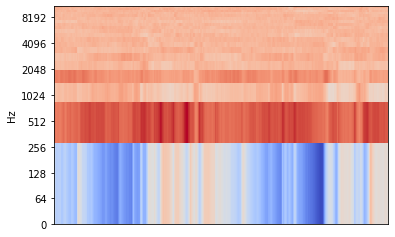

In [ ]:
n = 17
# Отображаем пример mfcc из xx_test
librosa.display.specshow(xx_test[n]*maxx+minn, y_axis='log')

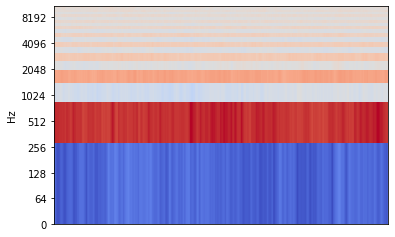

In [ ]:
# Отображаем mfcc из предикта
librosa.display.specshow(predict[n]*maxx+minn, y_axis='log')

In [ ]:
song_org = librosa.feature.inverse.mfcc_to_audio(xx_test[n]*maxx+minn)
song_pred = librosa.feature.inverse.mfcc_to_audio(predict[n]*maxx+minn)

In [ ]:
# Оригинальная
ipd.Audio(song_org, rate = sr)

In [ ]:
# Предикт
ipd.Audio(song_pred, rate = sr)